In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis= 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [12]:
training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))



print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X : mnist.test.images, Y: mnist.test.labels}))


Epoch: 0001 cost =  2.741801216
Epoch: 0002 cost =  1.099826260
Epoch: 0003 cost =  0.873676740
Epoch: 0004 cost =  0.764441933
Epoch: 0005 cost =  0.695325020
Epoch: 0006 cost =  0.648268606
Epoch: 0007 cost =  0.612624692
Epoch: 0008 cost =  0.583743505
Epoch: 0009 cost =  0.560002179
Epoch: 0010 cost =  0.539308334
Epoch: 0011 cost =  0.523085384
Epoch: 0012 cost =  0.507535775
Epoch: 0013 cost =  0.495195963
Epoch: 0014 cost =  0.482183220
Epoch: 0015 cost =  0.471686847
Accuracy:  0.8879


Label :  [0]
Prediction :  [0]


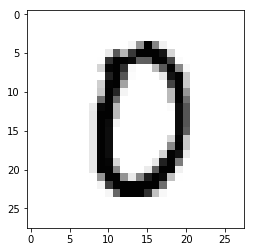

In [57]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print("Prediction : ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X : mnist.test.images[r: r + 1]}))

plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
plt.show()